[3749.196280143219, 4326.662575425886, 5478.756947115411, 6485.848858220533, 8215.965645253278, 9179.498493719297, 10551.440926936704, 12583.924128678638, 21485.081904803104]
[2833, 4008, 1996, 2090, 1933]
rangal:  2833
index:  2832
rangal:  4008
index:  4007
rangal:  1996
index:  1995
rangal:  2090
index:  2089
rangal:  1933
index:  1932


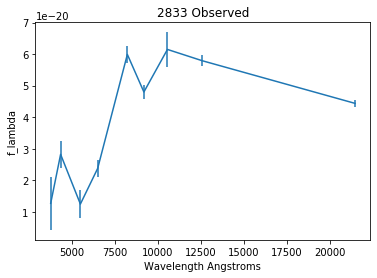

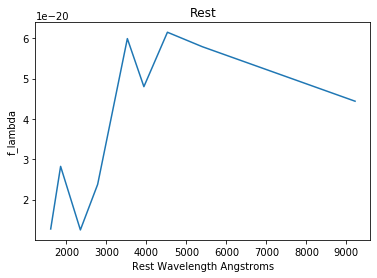

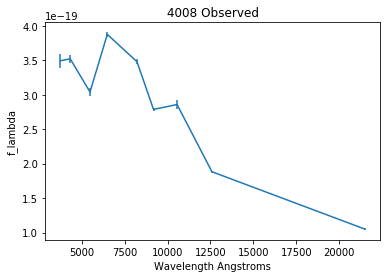

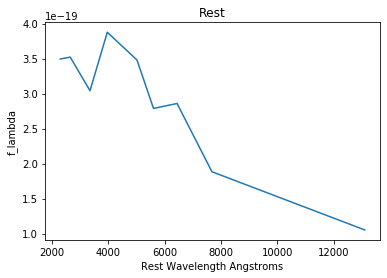

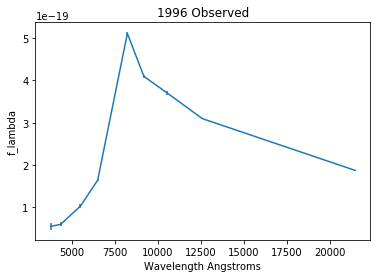

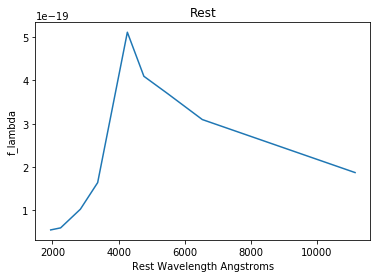

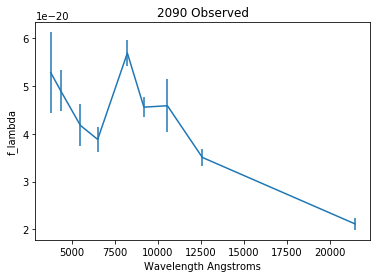

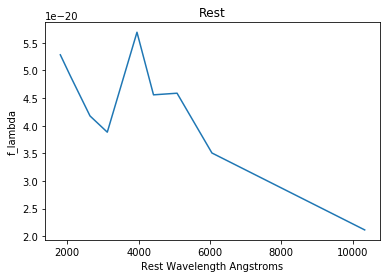

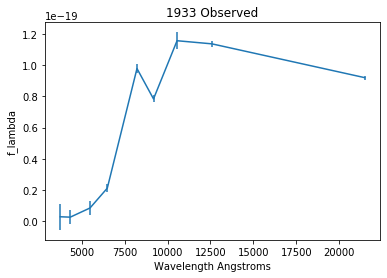

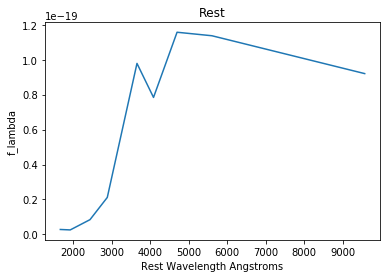

In [5]:
import random
import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib
import matplotlib.pyplot as plt
import csv
import math

from astropy.io import ascii

xval = []
yval = []

#filterfile = ("/Users/grudnick/Work/GOGREEN/Data/Releases/v1.1/PHOTOMETRY/FILTERS/FILTER.RES.GOGREEN")
filterfile = ("/home/jacob/Documents/Research/FILTER.RES.GOGREEN")
f = open(filterfile, 'r')

# make dictionary to hold all filter curves
filtercurves = {}

for line in f:
    # print(repr(line))
    line = line.strip()
    cols = line.split()
    # print(cols)

# find number of lines for next filter curve
    nlines = int(cols[0])  # converts string to integer
    filtname = cols[1]  # name of that filter
# initialize array for lambda and transmission
    lam = np.array([])
    trans = np.array([])
    for iline in range(nlines):
    # reads in a single line
        transline = f.readline()
        transline = transline.strip()
        transcols = transline.split()
        lam = np.append(lam, float(transcols[1]))
        trans = np.append(trans, float(transcols[2]))
    filtercurves[filtname] = {'lam': lam, 'trans': trans}

#print(filtercurves['g'])
#print('wavelength of filter curve = ', filtercurves['g']['lam'])

top = (np.trapz(filtercurves['VIMOSU']['trans'] * filtercurves['VIMOSU']['lam'], x = filtercurves['VIMOSU']['lam']))
bot = (np.trapz(filtercurves['VIMOSU']['trans'], x = filtercurves['VIMOSU']['lam']))
Uwave = top / bot
#print(Uwave, "wavelength of U filter")

#top = (np.trapz(filtercurves['VIMOSU']['trans'] * filtercurves['VIMOSU']))

top = (np.trapz(filtercurves['VIMOSB']['trans'] * filtercurves['VIMOSB']['lam'], x = filtercurves['VIMOSB']['lam']))
bot = (np.trapz(filtercurves['VIMOSB']['trans'], x = filtercurves['VIMOSB']['lam']))
Bwave = top / bot
#print(Bwave, "wavelength of B filter")

top = (np.trapz(filtercurves['VIMOSV']['trans'] * filtercurves['VIMOSV']['lam'], x = filtercurves['VIMOSV']['lam']))
bot = (np.trapz(filtercurves['VIMOSV']['trans'], x = filtercurves['VIMOSV']['lam']))
Vwave = top / bot
#print(Vwave, "wavelength of V filter")

top = (np.trapz(filtercurves['VIMOSR']['trans'] * filtercurves['VIMOSR']['lam'], x = filtercurves['VIMOSR']['lam']))
bot = (np.trapz(filtercurves['VIMOSR']['trans'], x = filtercurves['VIMOSR']['lam']))
Rwave = top / bot
#print(Rwave, "wavelength of R filter")

top = (np.trapz(filtercurves['VIMOSI']['trans'] * filtercurves['VIMOSI']['lam'], x = filtercurves['VIMOSI']['lam']))
bot = (np.trapz(filtercurves['VIMOSI']['trans'], x = filtercurves['VIMOSI']['lam']))
Iwave = top / bot
#print(Iwave, "Wavelength of I filter")

top = (np.trapz(filtercurves['DECamz']['trans'] * filtercurves['DECamz']['lam'], x = filtercurves['DECamz']['lam']))
bot = (np.trapz(filtercurves['DECamz']['trans'], x = filtercurves['DECamz']['lam']))
Zwave = top / bot
#print(Zwave, "wavelength of Z filter")

top = (np.trapz(filtercurves['FOURSTARJ1']['trans'] * filtercurves['FOURSTARJ1']['lam'], x = filtercurves['FOURSTARJ1']['lam']))
bot = (np.trapz(filtercurves['FOURSTARJ1']['trans'], x = filtercurves['FOURSTARJ1']['lam']))
Ywave = top / bot
#print(Ywave, "wavelength of Y")

top = (np.trapz(filtercurves['HAWKIJ']['trans'] * filtercurves['HAWKIJ']['lam'], x = filtercurves['HAWKIJ']['lam']))
bot = (np.trapz(filtercurves['HAWKIJ']['trans'], x = filtercurves['HAWKIJ']['lam']))
Jwave = top / bot
#print(Jwave, "wavelength of J")

top = (np.trapz(filtercurves['HAWKIKs']['trans'] * filtercurves['HAWKIKs']['lam'], x = filtercurves['HAWKIKs']['lam']))
bot = (np.trapz(filtercurves['HAWKIKs']['trans'], x = filtercurves['HAWKIKs']['lam']))
Kwave = top / bot
#print(Kwave, "wavelength of K")

top = (np.trapz(filtercurves['IRAC1']['trans'] * filtercurves['IRAC1']['lam'], x = filtercurves['IRAC1']['lam']))
bot = (np.trapz(filtercurves['IRAC1']['trans'], x = filtercurves['IRAC1']['lam']))
I1wave = top / bot
#print(I1wave, "wavelength of IRAC1")

top = (np.trapz(filtercurves['IRAC2']['trans'] * filtercurves['IRAC2']['lam'], x = filtercurves['IRAC2']['lam']))
bot = (np.trapz(filtercurves['IRAC2']['trans'], x = filtercurves['IRAC2']['lam']))
I2wave = top / bot
#print(I2wave, "wavelength of IRAC2")

#top = (np.trapz(filtercurves['IRAC3']['trans'] * filtercurves['IRAC3']['lam'], x = filtercurves['IRAC3']['lam']))
#bot = (np.trapz(filtercurves['IRAC3']['trans'], x = filtercurves['IRAC3']['lam']))
#I3wave = top / bot
#print(I3wave, "wavelength of IRAC3")

#top = (np.trapz(filtercurves['IRAC4']['trans'] * filtercurves['IRAC4']['lam'], x = filtercurves['IRAC4']['lam']))
#bot = (np.trapz(filtercurves['IRAC4']['trans'], x = filtercurves['IRAC4']['lam']))
#I4wave = top / bot
#print(I4wave, "wavelength of IRAC4")

xval.append(Uwave)
xval.append(Bwave)
xval.append(Vwave)
xval.append(Rwave)
xval.append(Iwave)
xval.append(Zwave)
xval.append(Ywave)
xval.append(Jwave)
xval.append(Kwave)
#xval.append(I1wave)
#xval.append(I2wave)
#xval.append(I3wave)
#xval.append(I4wave)
print(xval)

freq = []
#freq = [(3 * 10**18) / xval]
#for lam in range(11):
    #freq.append((3 * 10**18) / xval[lam])
#print(freq)
for lam in range(9):
    freq.append((3 * 10**18) / xval[lam])
#print(freq)
    

#path = "/Users/grudnick/Work/GOGREEN/Data/Releases/v1.1/PHOTOMETRY"
path = "/home/jacob/PHOTOMETRY"
zfile = path + "/SPECZ_MATCHED/compilation_SpARCS-0035.dat"
zdat = ascii.read(zfile)

photfile = path + "/PHOTOM_CATS/SpARCS-0035_totalall_HAWKIKs.cat"
photdat = ascii.read(photfile)

#lambda_rest = lambda_obs / (1+z)

# this prints out all the spec-z values and also pulls values for the same objects from the observed photometry files.
#for i in range(len(photdat['id'])):
    #print(photdat['id'][i], zdat['PHOTCATID'][i], zdat['spec_z'][i])
    # you *could* put an if statement here to test if an object has a spec-z
# print(data)
# print(data['PHOTCATID'][1],data['spec_z'][1])

totmag = np.vectorize(photdat['HAWKIKs_tot'])
#goodmag = -2.5 * np.log10(totmag) + 25
goodmag = -2.5 * np.log10(photdat['HAWKIKs_tot']) + 25

# a better way is to use the numpy.where() command
# this is an array of all indices which satisfy the condition in the ()
izspec = np.where((zdat['spec_z'] > 0) & (photdat['totmask'] == 0) & (photdat['K_flag'] == 0) & (goodmag < 23))
#izspec = np.where(np.any(zdat['quality'] == 3 or zdat['quality'] == 4) & (photdat['totmask'] == 0) & (photdat['K_flag'] == 0) & (goodmag < 23))
#print(izspec)

# this prints the rows of the two tables that correspond to these indices
#print(photdat['id'][izspec], zdat['PHOTCATID'][izspec], zdat['spec_z'][izspec])

# an equally good way is to make an array of booleans
# this makes an array of the same size as your table, but with a list of "True" and "False" depending on whether or not you satisfy the condition
#goodvals = ((zdat['spec_z'] > 0) & (photdat['totmask'] == 0))
#print(goodvals)

# this prints the rows of the two tables that have the Boolean value==True
#print(photdat['id'][goodvals], zdat['PHOTCATID'][goodvals], zdat['spec_z'][goodvals])

random.seed(24)
sample_list = random.sample(list(photdat['id'][izspec]), k=5)
print(sample_list)

fluxu = []
fluxb = []
fluxv = []
fluxr = []
fluxi = []
fluxz = []
fluxy = []
fluxj = []
fluxk = []
fluxi1 = []
fluxi2 = []
#fluxi3 = []
#fluxi4 = []

erru = []
errb = []
errv = []
errr = []
erri = []
errz = []
erry = []
errj = []
errk = []

galindex = []
xprime = []

gallamb = []

for rangal in sample_list:
    print('rangal: ', rangal)
    print('index: ', list(photdat['id']).index(rangal))
    index = list(photdat['id']).index(rangal)
    galindex.append(photdat['id'][index])
    fluxu.append(photdat['VIMOSU'][index])
    fluxb.append(photdat['VIMOSB'][index])
    fluxv.append(photdat['VIMOSV'][index])
    fluxr.append(photdat['VIMOSR'][index])
    fluxi.append(photdat['VIMOSI'][index])
    fluxz.append(photdat['DECamz'][index])
    fluxy.append(photdat['FOURSTARJ1'][index])
    fluxj.append(photdat['HAWKIJ'][index])
    fluxk.append(photdat['HAWKIKs'][index])
    
    erru.append(photdat['eVIMOSU'][index])
    errb.append(photdat['eVIMOSB'][index])
    errv.append(photdat['eVIMOSV'][index])
    errr.append(photdat['eVIMOSR'][index])
    erri.append(photdat['eVIMOSI'][index])
    errz.append(photdat['eDECamz'][index])
    erry.append(photdat['eFOURSTARJ1'][index])
    errj.append(photdat['eHAWKIJ'][index])
    errk.append(photdat['eHAWKIKs'][index])
    #fluxi1.append(photdat['IRAC1'][index])
    #fluxi2.append(photdat['IRAC2'][index])
    #fluxi3.append(photdat['IRAC3'][index])
    #fluxi4.append(photdat['IRAC4'][index])
    
mag25 =10 ** ((25 + 48.6) / -2.5)

    
for galaxy in range(5):
    galy = [fluxu[galaxy],fluxb[galaxy], fluxv[galaxy], fluxr[galaxy], fluxi[galaxy], fluxz[galaxy], fluxy[galaxy], fluxj[galaxy], fluxk[galaxy]]
    #galy = [fluxu[galaxy],fluxb[galaxy], fluxv[galaxy], fluxr[galaxy], fluxi[galaxy], fluxz[galaxy], fluxy[galaxy], fluxj[galaxy], fluxk[galaxy], fluxi1[galaxy],fluxi2[galaxy]]
    magu = -2.5 * np.log10(fluxu[galaxy]) + 25
    magv = -2.5 * np.log10(fluxv[galaxy]) + 25
    magb = -2.5 * np.log10(fluxb[galaxy]) + 25
    magr = -2.5 * np.log10(fluxr[galaxy]) + 25
    magi = -2.5 * np.log10(fluxz[galaxy]) + 25
    magz = -2.5 * np.log10(fluxz[galaxy]) + 25
    magy = -2.5 * np.log10(fluxy[galaxy]) + 25
    magj = -2.5 * np.log10(fluxj[galaxy]) + 25
    magk = -2.5 * np.log10(fluxk[galaxy]) + 25
    #magi1 = -2.5 * np.log10(fluxi1[galaxy]) + 25
    #magi2 = -2.5 * np.log10(fluxi2[galaxy]) + 25
   
    mageu = -2.5 * np.log10(erru[galaxy]) + 25
    magev = -2.5 * np.log10(errv[galaxy]) + 25
    mageb = -2.5 * np.log10(errb[galaxy]) + 25
    mager = -2.5 * np.log10(errr[galaxy]) + 25
    magei = -2.5 * np.log10(erri[galaxy]) + 25
    magez = -2.5 * np.log10(errz[galaxy]) + 25
    magey = -2.5 * np.log10(erry[galaxy]) + 25
    magej = -2.5 * np.log10(errj[galaxy]) + 25
    magek = -2.5 * np.log10(errk[galaxy]) + 25
    
    fnuu = (10 ** ((magu + 48.6) / -2.5)) * mag25
    fnub = (10 ** ((magb + 48.6) / -2.5)) * mag25
    fnuv = (10 ** ((magv + 48.6) / -2.5)) * mag25
    fnur = (10 ** ((magr + 48.6) / -2.5)) * mag25
    fnui = (10 ** ((magi + 48.6) / -2.5)) * mag25
    fnuz = (10 ** ((magz + 48.6) / -2.5)) * mag25
    fnuk = (10 ** ((magk + 48.6) / -2.5)) * mag25
    fnuy = (10 ** ((magy + 48.6) / -2.5)) * mag25
    fnuj = (10 ** ((magj + 48.6) / -2.5)) * mag25
    #fnui1 = (10 ** ((magi1 + 48.6) / -2.5)) * mag25
    #fnui2 = (10 ** ((magi2 + 48.6) / -2.5)) * mag25
    
    fnueu = (10 ** ((mageu + 48.6) / -2.5)) * mag25
    fnueb = (10 ** ((mageb + 48.6) / -2.5)) * mag25
    fnuev = (10 ** ((magev + 48.6) / -2.5)) * mag25
    fnuer = (10 ** ((mager + 48.6) / -2.5)) * mag25
    fnuei = (10 ** ((magei + 48.6) / -2.5)) * mag25
    fnuez = (10 ** ((magez + 48.6) / -2.5)) * mag25
    fnuek = (10 ** ((magek + 48.6) / -2.5)) * mag25
    fnuey = (10 ** ((magey + 48.6) / -2.5)) * mag25
    fnuej = (10 ** ((magej + 48.6) / -2.5)) * mag25
    
    flamu = (((3 * 10 ** 18) / ((xval[0]) ** 2)) * fnuu) * ((0.361 * 10**6) / (10**-23))
    flamb = (((3 * 10 ** 18) / ((xval[1]) ** 2)) * fnub) * ((0.361 * 10**6) / (10**-23))
    flamv = (((3 * 10 ** 18) / ((xval[2]) ** 2)) * fnuv) * ((0.361 * 10**6) / (10**-23))
    flamr = (((3 * 10 ** 18) / ((xval[3]) ** 2)) * fnur) * ((0.361 * 10**6) / (10**-23))
    flami = (((3 * 10 ** 18) / ((xval[4]) ** 2)) * fnui) * ((0.361 * 10**6) / (10**-23))
    flamz = (((3 * 10 ** 18) / ((xval[5]) ** 2)) * fnuz) * ((0.361 * 10**6) / (10**-23))
    flamj = (((3 * 10 ** 18) / ((xval[7]) ** 2)) * fnuj) * ((0.361 * 10**6) / (10**-23))
    flamk = (((3 * 10 ** 18) / ((xval[8]) ** 2)) * fnuk) * ((0.361 * 10**6) / (10**-23))
    flamy = (((3 * 10 ** 18) / ((xval[6]) ** 2)) * fnuy) * ((0.361 * 10**6) / (10**-23))
    #flami1 = (((3 * 10 ** 18) / ((xval[9]) ** 2)) * fnui1) * ((0.361 * 10**6) / (10**-23))
    #flami2 = (((3 * 10 ** 18) / ((xval[10]) ** 2)) * fnui2) * ((0.361 * 10**6) / (10**-23))
    
    flameu = (((3 * 10 ** 18) / ((xval[0]) ** 2)) * fnueu) * ((0.361 * 10**6) / (10**-23))
    flameb = (((3 * 10 ** 18) / ((xval[1]) ** 2)) * fnueb) * ((0.361 * 10**6) / (10**-23))
    flamev = (((3 * 10 ** 18) / ((xval[2]) ** 2)) * fnuev) * ((0.361 * 10**6) / (10**-23))
    flamer = (((3 * 10 ** 18) / ((xval[3]) ** 2)) * fnuer) * ((0.361 * 10**6) / (10**-23))
    flamei = (((3 * 10 ** 18) / ((xval[4]) ** 2)) * fnuei) * ((0.361 * 10**6) / (10**-23))
    flamez = (((3 * 10 ** 18) / ((xval[5]) ** 2)) * fnuez) * ((0.361 * 10**6) / (10**-23))
    flamej = (((3 * 10 ** 18) / ((xval[7]) ** 2)) * fnuej) * ((0.361 * 10**6) / (10**-23))
    flamek = (((3 * 10 ** 18) / ((xval[8]) ** 2)) * fnuek) * ((0.361 * 10**6) / (10**-23))
    flamey = (((3 * 10 ** 18) / ((xval[6]) ** 2)) * fnuey) * ((0.361 * 10**6) / (10**-23))
    
    #gallamy = [flamu, flamb, flamv, flamr, flami, flamz, flamy, flamj, flamk, flami1, flami2]
    gallamy = [flamu, flamb, flamv, flamr, flami, flamz, flamy, flamj, flamk]
    error = [flameu, flameb, flamev, flamer, flamei, flamez, flamey, flamej, flamek]
    plt.errorbar(xval, gallamy, yerr = error)
    plt.xlabel('Wavelength Angstroms')
    plt.ylabel('f_lambda')
    titlestr = str(galindex[galaxy]) + ' Observed'
    #plt.title('Galaxy One: ', galindex[galaxy])
    #plt.title('Observed')
    plt.title(titlestr)
    #You are using galindex as an index, when it is really an ID.  In the specific case of *this* catalog
    #this kind of works (if you subtract -1) because the IDs are sequential starting at 1.  But for a 
    #generic catalog this won't work.
    #for the love of god, don't ever call non-index variables "index":-)
    magstr = 'Kmag = ' + "{:0.2f}".format(goodmag[galindex[galaxy] - 1])
    #plt.text(10000, 8, goodmag[galindex[galaxy]])
    #plt.text(15000, 1.1e-19, magstr)
    plt.show()
    
    z = zdat['spec_z'][galindex[galaxy]-1]
    #print(galindex[galaxy])
    #index = list(zdat['PHOTCATID']).index(galindex[galaxy])
    rest = xval / (1+z)
    #print("z is equal to: ", z,"rest: ", rest)
    xprime.append(rest) #lambda_rest = lambda_obs / (1+z)
    #print(xprime)
    
    plt.plot(xprime[galaxy], gallamy, '-')
    plt.xlabel('Rest Wavelength Angstroms')
    plt.ylabel('f_lambda')
    plt.title('Rest')
    #plt.text(1, 1, z)
    plt.show()